In [1]:
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Import modules created for this project
import project_modules.calibrate_camera as cc
import project_modules.image_process as ip

In [2]:
# Misc functions

def get_test_image_names():
    images = glob.glob('test_images/*.jpg')
    return images

def display_images(img, processed_img):
    plt.figure(figsize=(15, 10))
    plt.subplot(1, 2, 1)
    plt.title('Original')
    plt.axis('off')
    plt.imshow(img)

    plt.subplot(1, 2, 2)
    plt.title('processed')
    plt.axis('off')    
    plt.imshow(processed_img, cmap='gray')
    

In [3]:
# Image procss pipeline for actual iamge
def image_process_pipeline(img, imgpoints, objpoints):
    img = ip.undistort_image(img, imgpoints, objpoints)
    img = ip.color_threshold(img)
    img, Minv = ip.perspective_transform(img)    
    return img, Minv

In [4]:
image_names = cc.get_calibration_image_names()
imgpoints, objpoints = cc.calibrate_camera(image_names)

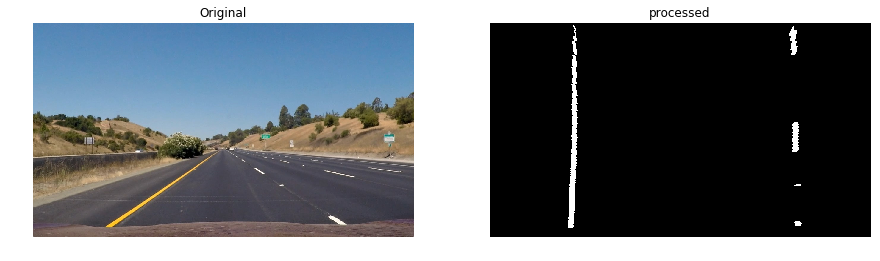

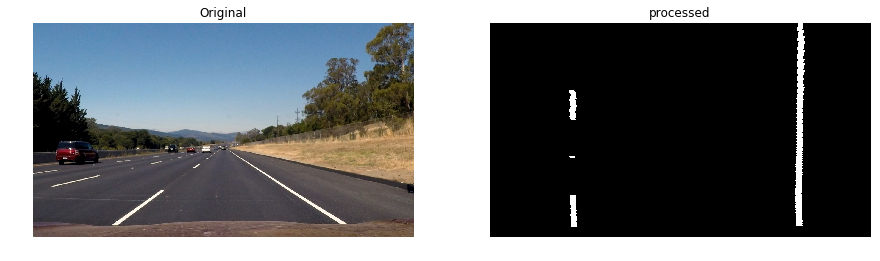

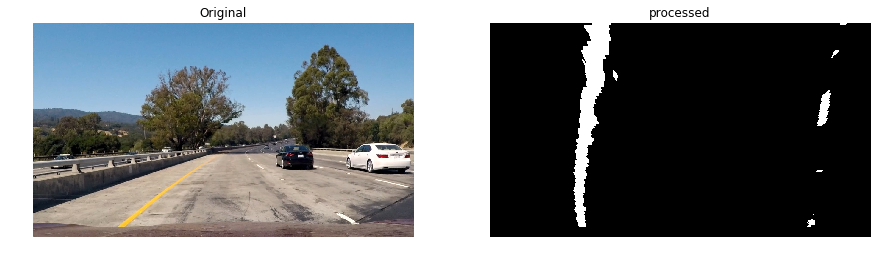

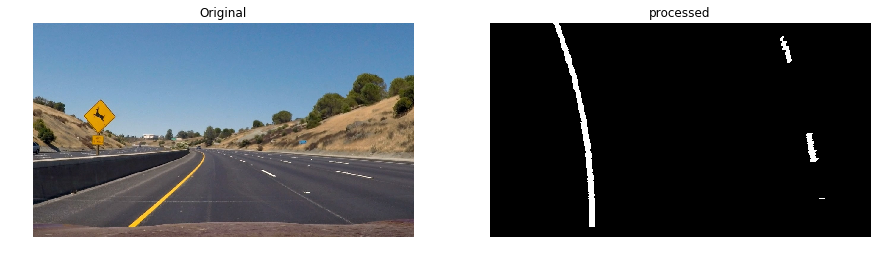

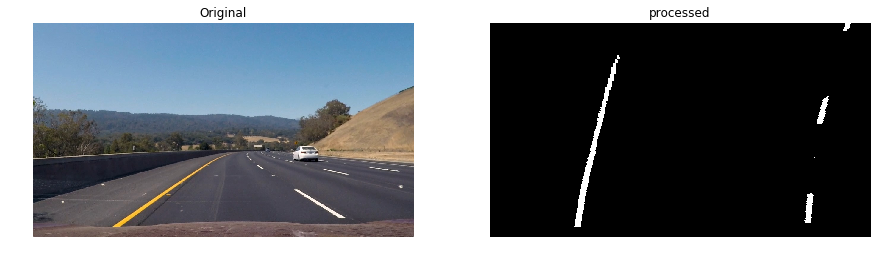

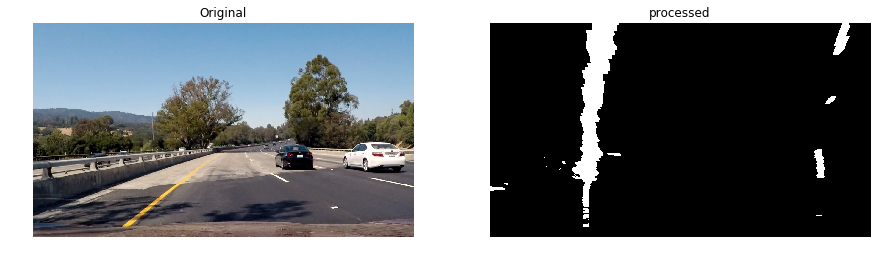

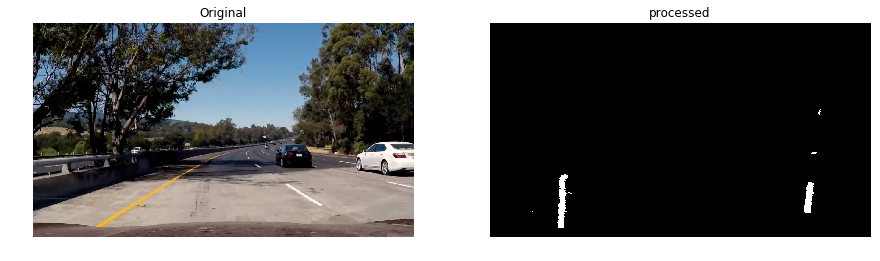

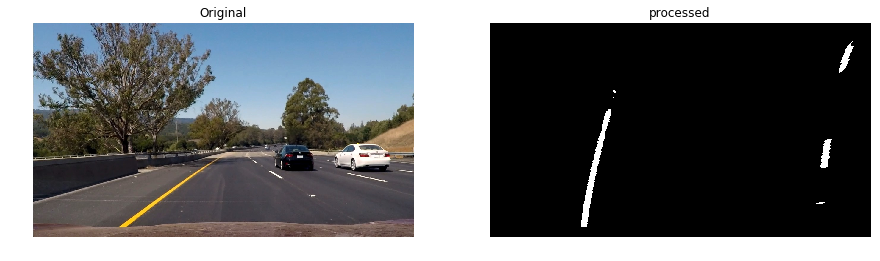

In [5]:
# Test full image process pipeline on test images
test_images = get_test_image_names()

for image in test_images:
    img = cv2.imread(image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    processed_img, Minv = image_process_pipeline(img, imgpoints, objpoints)
    display_images(img, processed_img)   
    processed_filename = 'output_images/binary_warp_processed_' + os.path.basename(image)       
    mpimg.imsave(processed_filename, processed_img, cmap='gray')